In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [7]:
df = np.load('sdss_galaxy_colors.npy')

In [8]:
df = pd.DataFrame(df)

In [9]:
df

,u,g,r,i,z,spec_class,redshift,redshift_err
0,19.84132,19.52656,19.46946,19.17955,19.10763,b'QSO',0.539301,0.000065
1,19.86318,18.66298,17.84272,17.38978,17.14313,b'GALAXY',0.164570,0.000012
2,19.97362,18.31421,17.47922,17.07440,16.76174,b'GALAXY',0.041900,0.000022
3,19.05989,17.49459,16.59285,16.09412,15.70741,b'GALAXY',0.044277,0.000011
4,19.45567,18.33084,17.67185,17.30189,17.13650,b'GALAXY',0.041644,0.000018
...,...,...,...,...,...,...,...,...
49995,18.78195,17.36771,16.62808,16.24659,15.97817,b'GALAXY',0.078153,0.000031
49996,19.65251,17.59881,16.63644,16.19178,15.85334,b'GALAXY',0.079438,0.000020
49997,19.82667,18.10038,17.16133,16.57960,16.19755,b'GALAXY',0.078459,0.000022
49998,19.98672,19.75385,19.57130,19.27739,19.25895,b'QSO',1.567295,0.000451


## Overfitting Trees

Complete the function accuracy_by_treedepth. The function should return the median difference for both the testing and training data sets for each of the tree depths in depths.

accuracy_by_treedepth should take the following arguments:

1. features and targets (as in previous problems);

2. depths: an array of tree depths to be used as the max_depth of the decision tree regressor.

Your function should return two lists (or arrays) containing the median_diff values for the predictions made on the training and test sets using the maximum tree depths given by the depths.

For example, if depths is [3, 5, 7], then your function should return two lists of length 3. You can choose the size of the split between your testing and training data (if in doubt, 50:50 is fine).

We've included code to plot the differences as a function of tree depths. You should take a moment to familiarise yourself with what each line is doing. If your code is working well then your plot should look a bit like the following:



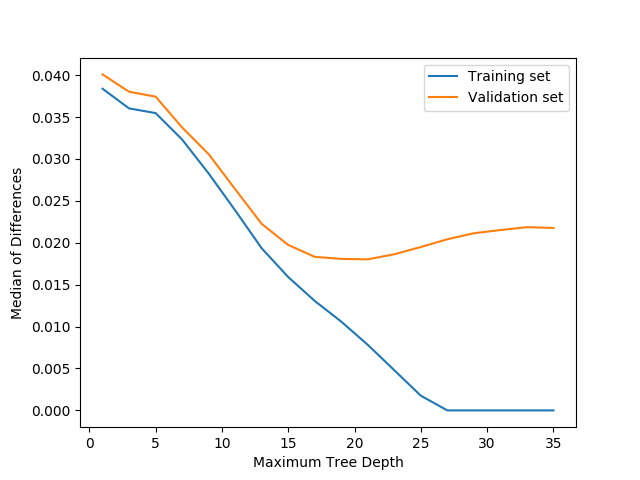

In [26]:
def get_features_targets(data):
    features = np.zeros((data.shape[0], 4))
    features[:, 0] = data['u'] - data['g']
    features[:, 1] = data['g'] - data['r']
    features[:, 2] = data['r'] - data['i']
    features[:, 3] = data['i'] - data['z']
    targets = data['redshift']
    return features, targets

In [27]:
def median_diff(predicted, actual):
    return np.median(abs(predicted - actual))

In [28]:

def accuracy_by_treedepth(features, targets, depths):
    # split the data into testing and training sets
    split = features.shape[0]//2
    train_features, test_features = features[:split], features[split:]
    train_targets, test_targets = targets[:split], targets[split:]

    # Initialise arrays or lists to store the accuracies for the below loop
    train_diffs = []
    test_diffs = []

    # Loop through depths
    for depth in depths:
    # initialize model with the maximum depth. 
        dtr = DecisionTreeRegressor(max_depth=depth)

    # train the model using the training set
        dtr.fit(train_features, train_targets)

    # Get the predictions for the training set and calculate their med_diff
        predictions = dtr.predict(train_features)
        train_diffs.append(median_diff(train_targets, predictions))

    # Get the predictions for the testing set and calculate their med_diff
        predictions = dtr.predict(test_features)
        test_diffs.append(median_diff(test_targets, predictions))

    # Return the accuracies for the training and testing sets
    return train_diffs, test_diffs   



Depth with lowest median difference : 21


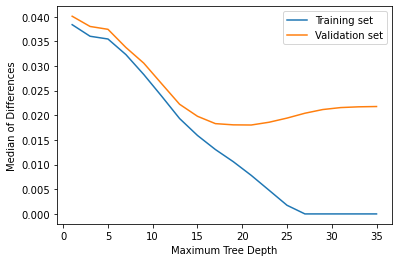

In [31]:

features, targets = get_features_targets(df)

# Generate several depths to test
tree_depths = [i for i in range(1, 36, 2)]

# Call the function
train_med_diffs, test_med_diffs = accuracy_by_treedepth(features, targets, tree_depths)
print("Depth with lowest median difference : {}".format(tree_depths[test_med_diffs.index(min(test_med_diffs))]))

# Plot the results
train_plot = plt.plot(tree_depths, train_med_diffs, label='Training set')
test_plot = plt.plot(tree_depths, test_med_diffs, label='Validation set')
plt.xlabel("Maximum Tree Depth")
plt.ylabel("Median of Differences")
plt.legend()
plt.show()

We can see that the accuracy of the decision tree on the training set gets better as we allow the tree to grow to greater depths. In fact, at a depth of 27 our errors goes to zero!

Conversly, the accuracy measure of the predictions for the test set gets better initially and then worse at larger tree depths. At a tree depth ~19 the decision tree starts to overfit the data. This means it tries to take into account outliers in the training set and loses its general predictive accuracy.

Overfitting is a common problem with decision trees and can be circumvented by adjusting parameters like the tree depth or setting a minimum number of cases at each node. For now, we will set a maximum tree depth of 19 to prevent over-fitting in our redshift problem.

In [32]:
#depth with lowest median difference

(tree_depths[test_med_diffs.index(min(test_med_diffs))])

21

In [33]:
test_med_diffs

[0.04008977774572968,
 0.03801786,
 0.03743818000000001,
 0.03375846501159519,
 0.030574280000000002,
 0.026391610341062008,
 0.022239937917045857,
 0.01980017088158839,
 0.018311727466666667,
 0.018063169432186884,
 0.018030656842105273,
 0.018593909073614523,
 0.019434412500000012,
 0.020420306833333336,
 0.021169921428571426,
 0.02156763000000008,
 0.021719854000000004,
 0.021780135]

In [34]:
min(test_med_diffs)

0.018030656842105273

In [35]:
test_med_diffs.index(min(test_med_diffs))

10

In [36]:
tree_depths[10]

21

## K-Fold cross validation

Your task is to complete the function cross_validate_model. The function takes 4 arguments:

1. model, feaures, and targets as in previous problems;
2. k in our k-fold. This is the number of subsets to train and test.

Your function should return a list containing the k median of differences for each of the k folds using median_diff.
Note that we have set the max_depth=19 when we initialise the decision tree to prevent the model from overfitting.

KFolds usage: 

We have created the KFold object to give you a set of training and testing indices for each of the k runs. It is worth taking a moment to understand this.

Specifically, the object is initialised with

#kf = KFold(n_splits=k, shuffle=True)
    
The n_splits=k passes our desired number of subsets/folds. We want to shuffle the data (as previously explained). The iterator is then used with:

#for train_indices, test_indices in kf.split(features):

The kf.split(features) is an iterator that, for each of the k iterations, returns two arrays of indices to be used with our feature and target arrays, i.e. features[train_indices], targets[train_indices]

In [37]:
def get_features_targets(data):
    features = np.zeros((len(data), 4))
    features[:, 0] = data['u'] - data['g']
    features[:, 1] = data['g'] - data['r']
    features[:, 2] = data['r'] - data['i']
    features[:, 3] = data['i'] - data['z']
    targets = data['redshift']
    return features, targets

In [38]:
def median_diff(predicted, actual):
    return np.median(abs(predicted - actual))

In [39]:
from sklearn.model_selection import KFold

In [40]:
def cross_validate_model(model, features, targets, k):
    kf = KFold(n_splits=k, shuffle=True)

    # initialise a list to collect median_diffs for each iteration of the loop below
    diffs = []

    for train_indices, test_indices in kf.split(features):
        train_features, test_features = features[train_indices], features[test_indices]
        train_targets, test_targets = targets[train_indices], targets[test_indices]

    # fit the model for the current set
        model.fit(train_features, train_targets)

    # predict using the model
        predictions = model.predict(test_features)

    # calculate the median_diff from predicted values and append to results array
        diffs.append(median_diff(predictions, test_targets))
    
    return diffs

In [42]:
features, targets = get_features_targets(df)

# initialize model with a maximum depth of 19
dtr = DecisionTreeRegressor(max_depth=19)

# call your cross validation function
diffs = cross_validate_model(dtr, features, targets, 10)
diffs = [round(val, 3) for val in diffs]


In [43]:
# Print the values
print('Differences: ',diffs)
print('Mean difference: ', round(np.mean(diffs),4))

Differences:  [0.017, 0.018, 0.017, 0.017, 0.017, 0.017, 0.018, 0.017, 0.017, 0.017]
Mean difference:  0.0172


## K-Fold cross validated predictions

Complete the function cross_validate_predictions. This is very similar to the previous question except instead of returning the med_diff accuracy measurements we would like to return a predicted value for each of the galaxies.

The function takes the same 4 arguments as the previous question, i.e. model, feaures, targets and k.

Your function should return a single variable. The returned variable should be a 1-D numpy array of length m, where m is the number of galaxies in our data set. You should make sure that you maintain the order of galaxies when giving your predictions, such that the first prediction in your array corresponds to the first galaxy in the features and targets arrays

In [75]:
def get_features_targets(data):
    features = np.zeros((len(data), 4))
    features[:, 0] = data['u'] - data['g']
    features[:, 1] = data['g'] - data['r']
    features[:, 2] = data['r'] - data['i']
    features[:, 3] = data['i'] - data['z']
    targets = data['redshift']
    return features, targets

def cross_validate_predictions(model, features, targets, k):
    kf = KFold(n_splits = k, shuffle = True)   #shuffle shuffles the data everytime
    all_predictions = np.zeros_like(targets)

    for train_indices, test_indices in kf.split(features):
        # split the data into training and testing
        train_features, test_features = features[train_indices], features[test_indices]
        train_targets, test_targets = targets[train_indices], targets[test_indices]

        # fit the model for the current set
        model.fit(train_features, train_targets)

        # predict using the model
        predictions = model.predict(test_features)    

        # put the predicted values in the all_predictions array defined above
        all_predictions[test_indices] = predictions
    
    return all_predictions


In [46]:
features, targets = get_features_targets(df)

  # initialize model
dtr = DecisionTreeRegressor(max_depth=19)

  # call your cross validation function
predictions = cross_validate_predictions(dtr, features, targets, 10)

  # calculate and print the rmsd as a sanity check
diffs = median_diff(predictions, targets)

print('Median difference: ',diffs)

Median difference:  0.017360818791560102


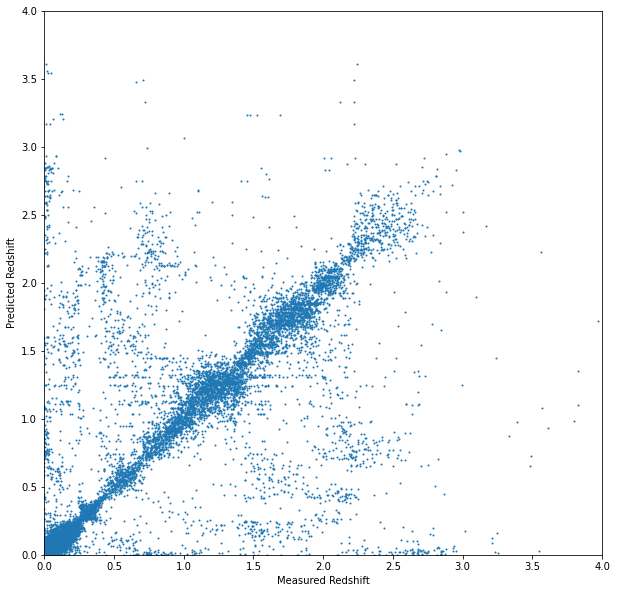

In [47]:
# plot the results to see how well our model looks
plt.figure(figsize = (10,10))

plt.scatter(targets, predictions, s=1)

plt.xlim(0, 4)
plt.ylim(0, 4)

plt.xlabel('Measured Redshift')
plt.ylabel('Predicted Redshift');

In [48]:
# instead of whole cross_validate_predictions function, we can use already available cross_val_predict function
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(dtr, features, targets, cv = 5)

In [49]:
predictions

array([1.48037023, 0.16971524, 0.08219378, ..., 0.08694006, 1.58584357,
       1.68882667])

## QSO and Galaxies

Write a function split_galaxies_qsos that splits our data containing both galaxies and QSOs into two arrays that contain only galaxies and QSOs respectively. Your function should take a single data argument.

The function should return two NumPy arrays, the first galaxies containing only rows from data that are galaxies and the second qsos containing only rows that are QSOs.

The data array contains a column data['spec_class'] where the values will either be b'GALAXY' or b'QSO'.

In [10]:
def cross_validate_model(model, features, targets, k):
    kf = KFold(n_splits = k , shuffle = True)
    diffs = []  
    for train_indices, test_indices in kf.split(features):
          # split the data into training and testing
        train_features, test_features = features[train_indices], features[test_indices]
        train_targets, test_targets = targets[train_indices], targets[test_indices]

        model.fit(train_features, train_targets)
        predictions = model.predict(test_features)

        diffs.append(median_diff(predictions, test_targets))
    
    return diffs


def split_galaxies_qsos(data):
    # split the data into galaxies and qsos arrays
    galaxies = data[data['spec_class'] == b'GALAXY'] 
    qsos = data[data['spec_class'] == b'QSO']

    # return the seperated galaxies and qsos arrays
    return galaxies, qsos


def cross_validate_median_diff(data):
    features, targets = get_features_targets(data)
    dtr = DecisionTreeRegressor(max_depth=19)
    return np.mean(cross_validate_model(dtr, features, targets, 10))

In [11]:
# Split the data set into galaxies and QSOs
galaxies, qsos= split_galaxies_qsos(data)

# Here we cross validate the model and get the cross-validated median difference
# The cross_validated_med_diff function is in "written_functions"

galaxy_med_diff = cross_validate_median_diff(galaxies)
qso_med_diff    = cross_validate_median_diff(qsos)

In [12]:
print("Median difference for Galaxies: ", galaxy_med_diff)
print("Median difference for QSOs: ",     qso_med_diff)

Median difference for Galaxies:  0.016221756062763097
Median difference for QSOs:  0.07427860435409792


So our QSOs have a greater median residual (≈ 0.074) than the galaxies ( ≈0.016). There are a couple of possibilities why this is the case.

There are far fewer QSOs (8525) than galaxies (41,475).
Galaxies aren't as bright as QSOs so they become too faint to be detected with SDSS at redshifts ≈ 0.4. This creates a measurement bias. When I take a random sample of galaxies the same size as the QSO data set I get a med_diff of ≈ 0.018 which is slightly higher than the full set, but not enough to account for the gap between the two populaions.

The figure below shows the normalised distribution function of the two populations.

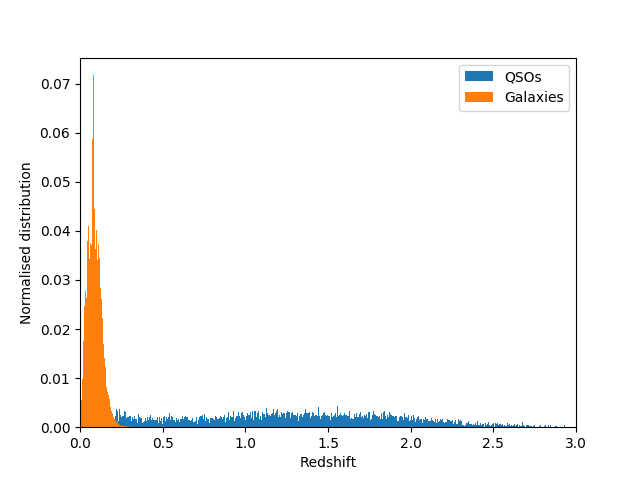

We can see that the majority of galaxies form a peak around 0.10 while the QSOs are resonably evenly distributed out to redshift ≈ 2.5. This can lead to a measurement bias. In the case of the galaxies we have trained our decision tree with target redshifts approximately less than 0.4. As such the predictions from this model will not be larger than the maximum target value. So the maximum difference (or residual) for each galaxy in this set will be a lot smaller than the maximum residual for the QSOs.

We can often get a clearer view of this by looking at the predicted redshifts vs actual redshifts in a plot.

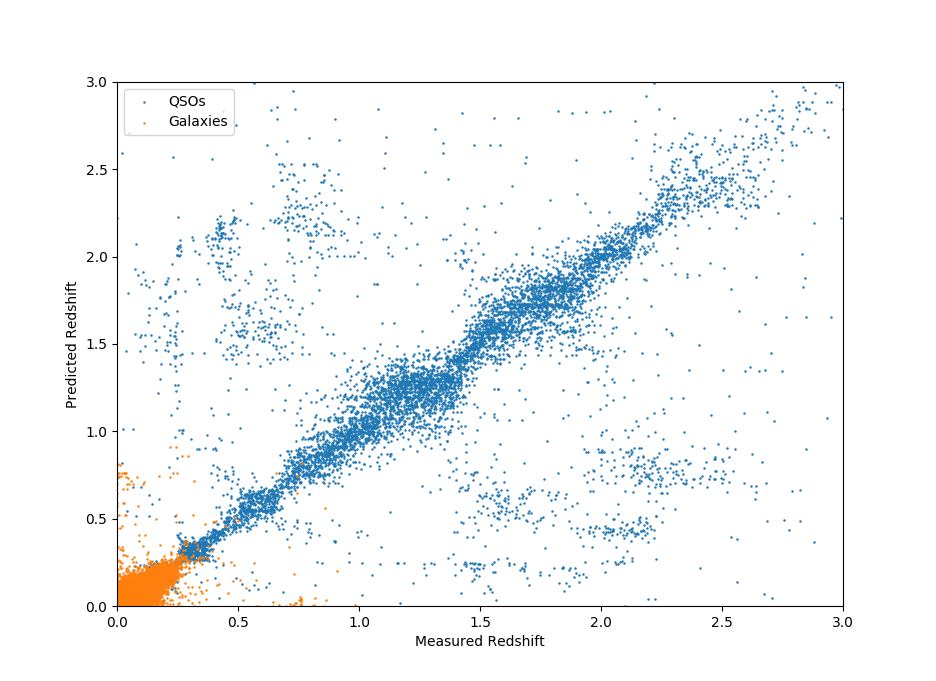